In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
real_data = pd.read_csv('datasets/breast.csv')
real_data['Diagnosis'] = real_data['Diagnosis'].map({'M':0, 'B':1})
synthetic_data = pd.read_csv('synthetic/GCSbc.csv')
synthetic_data['Diagnosis'] = synthetic_data['Diagnosis'].map({'M':0, 'B':1})

In [32]:
medgan_synthetic_data_path = 'synthetic/medganbc.npy'
run_medgan_results = True
if run_medgan_results:
    features = [    # Breast Cancer Wisconsin (Diagnostic)
        'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1',
        'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2',
        'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3', 
        'Diagnosis'
    ]
    synthetic_data  = np.load(medgan_synthetic_data_path)
    synthetic_data = pd.DataFrame(synthetic_data, columns=features)
    print(synthetic_data.shape)
    synthetic_data.head()

(3000, 31)


### Descriptive Statistics Comparison

In [33]:
real_data_stats = real_data.describe().transpose()
synthetic_data_stats = synthetic_data.describe().transpose()

absolute_difference_stats = (real_data_stats - synthetic_data_stats)
percentage_difference_stats = (absolute_difference_stats / real_data_stats) * 100
percentage_difference_stats.drop('count',axis=1,inplace=True)
percentage_difference_stats = percentage_difference_stats.add_suffix('_in_%')
percentage_difference_stats

,mean_in_%,std_in_%,min_in_%,25%_in_%,50%_in_%,75%_in_%,max_in_%
radius1,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000
texture1,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000
perimeter1,99.34155,96.61959,100.00000,100.00000,99.81318,98.99382,97.14912
area1,99.91815,99.84642,100.00000,100.00000,99.92424,99.88838,99.85875
smoothness1,-2058.85117,-12586.90512,100.00000,-389.18475,-1815.23967,-2962.30229,-6589.11309
compactness1,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000
concavity1,-252.31966,-718.93113,NaN,100.00000,100.00000,-94.48297,-1246.34145
concave_points1,-350.38751,-964.23610,NaN,100.00000,100.00000,-265.50092,-1126.44058
symmetry1,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000
fractal_dimension1,-868.08366,-12174.36753,100.00000,100.00000,42.64109,-1461.51562,-4891.87040


### Distributions

In [34]:
def plot_distributions(real_data, synthetic_data, show_figures = 40):
    columns = real_data.columns
    for i, column in enumerate(columns):
        if synthetic_data[column].loc[0] == 0:
            continue
        if i >= show_figures:
            break
        real_data[column].plot(kind='density', label='Real Data', color='blue')
        synthetic_data[column].plot(kind='density', label='Synthetic Data', color='orange')
        plt.title(f'Distribution of {column}')
        plt.legend()
        plt.tight_layout()
        plt.show()

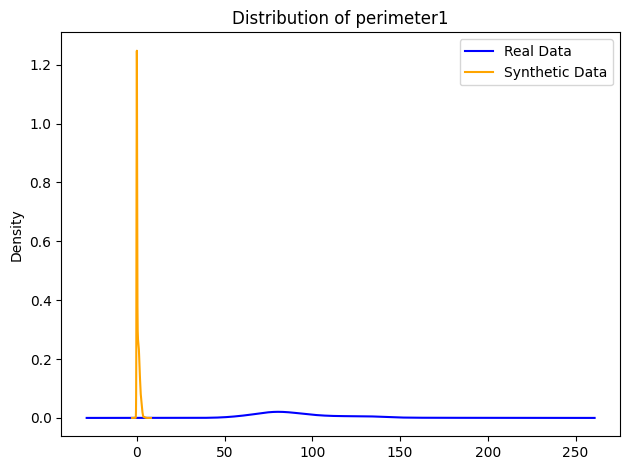

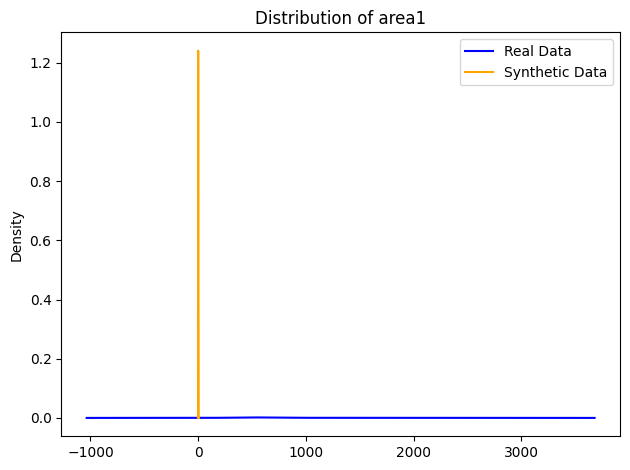

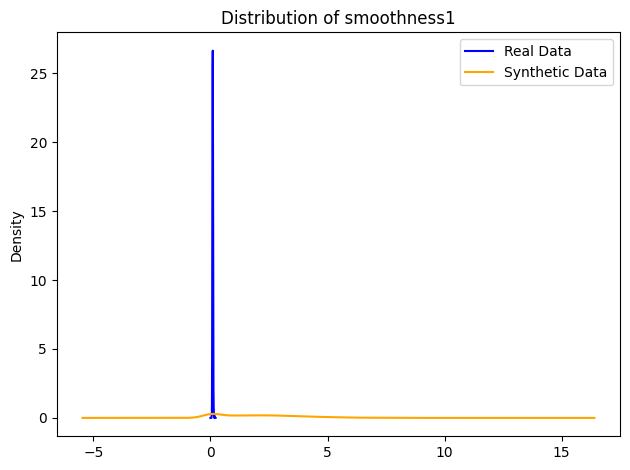

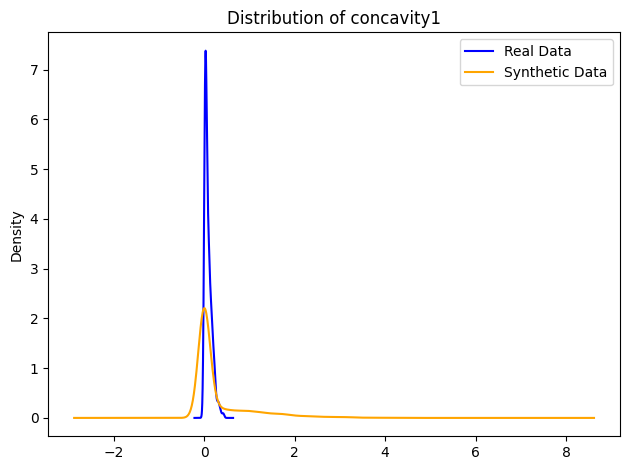

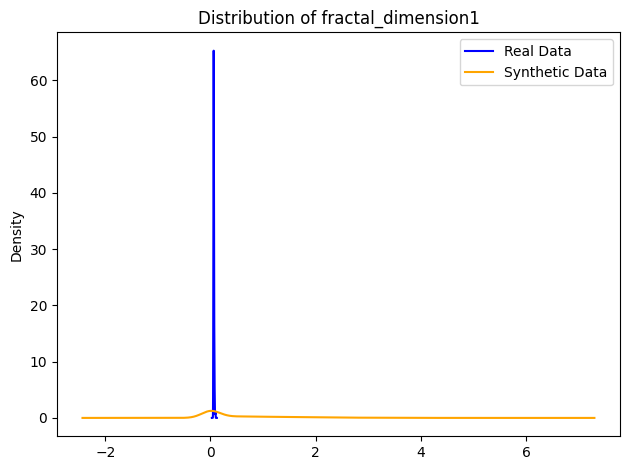

In [35]:
plot_distributions(real_data, synthetic_data, show_figures=10)

### Kolmogorov–Smirnov test

In [36]:
from scipy.stats import ks_2samp
def ks_test_on_dataframes(real_data, synthetic_data):
    results = {}
    for column in real_data.columns:
        if column in synthetic_data.columns:
            stat, p_value = ks_2samp(real_data[column], synthetic_data[column])
            results[column] = {'KS Statistic': stat, 'p-value': p_value}
    return results
ks_results = ks_test_on_dataframes(real_data, synthetic_data)
pd.set_option('display.float_format', lambda x: f'{x:.5f}')
pd.DataFrame(ks_results).transpose()

,KS Statistic,p-value
radius1,1.00000,0.00000
texture1,1.00000,0.00000
perimeter1,1.00000,0.00000
area1,1.00000,0.00000
smoothness1,0.79924,0.00000
compactness1,1.00000,0.00000
concavity1,0.66449,0.00000
concave_points1,0.62082,0.00000
symmetry1,1.00000,0.00000
fractal_dimension1,0.50400,0.00000


###  Correlation Analysis

In [37]:
correlation_real = real_data.corr()
correlation_synthetic = synthetic_data.corr()

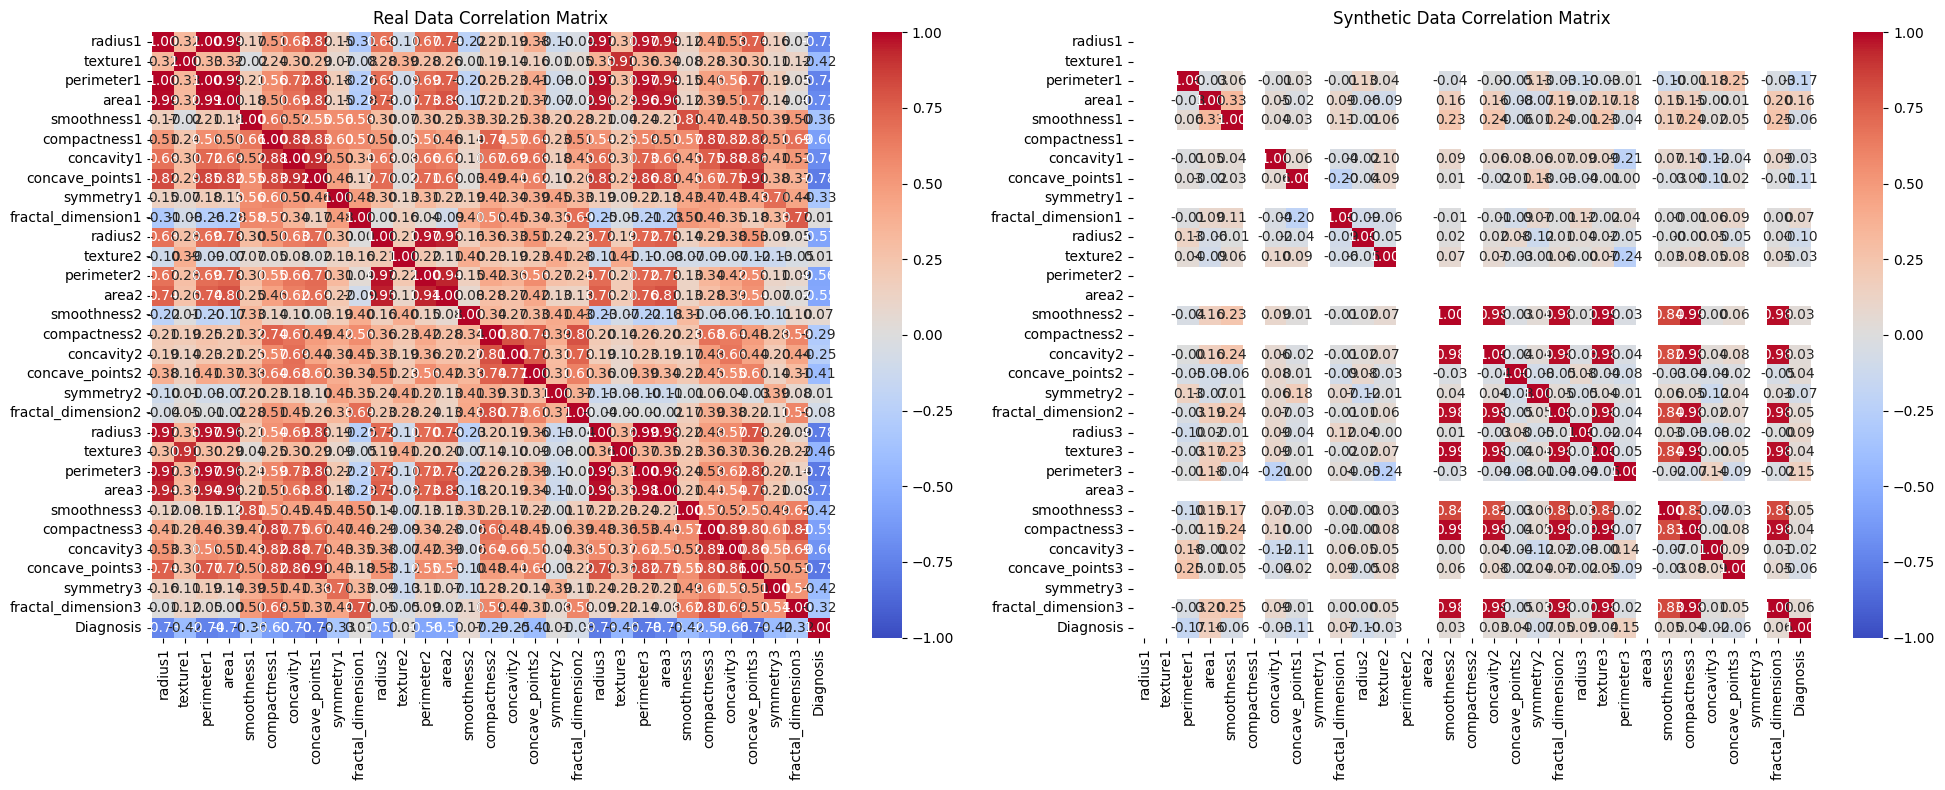

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.heatmap(correlation_real, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Real Data Correlation Matrix')
sns.heatmap(correlation_synthetic, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Synthetic Data Correlation Matrix')
plt.tight_layout()
plt.show()

#### Difference Correlation Maxtrix

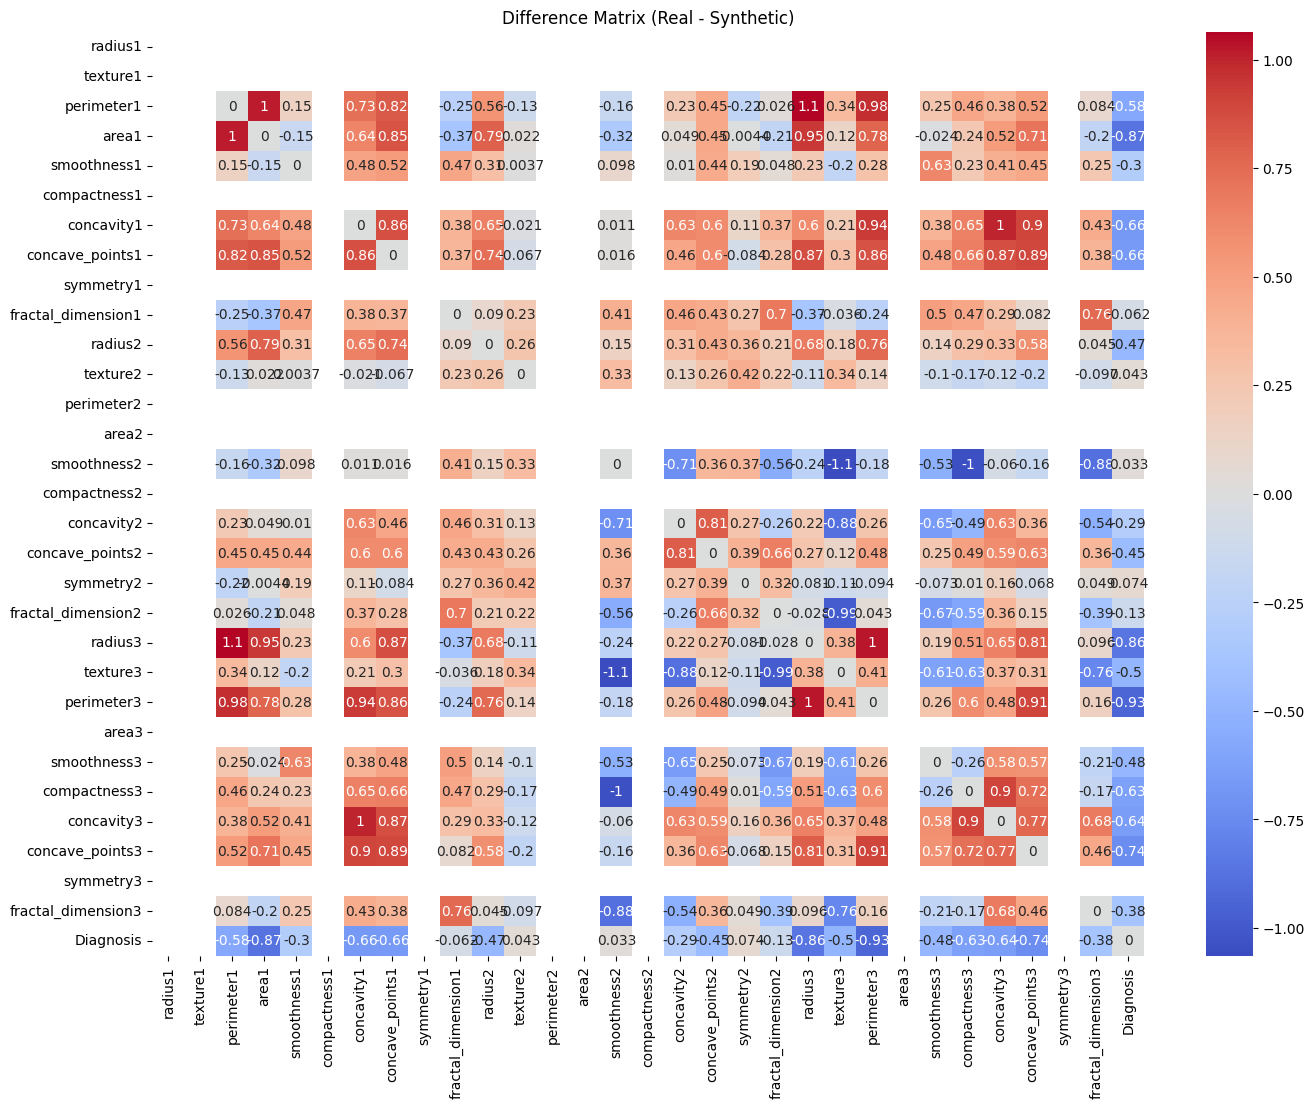

In [39]:
difference_matrix = correlation_real - correlation_synthetic
plt.figure(figsize=(16, 12)) 
sns.heatmap(difference_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Difference Matrix (Real - Synthetic)')
plt.show()

Correlation of Correlations

In [40]:
# Extract the upper triangular part of the correlation matrices excluding the diagonal
triu_indices = np.triu_indices_from(correlation_real, k=1)
real_upper = correlation_real.values[triu_indices]
synthetic_upper = correlation_synthetic.values[triu_indices]
# Compute the correlation between the upper triangular values
comparison_corr = np.corrcoef(real_upper, synthetic_upper)[0, 1]
print(f'Correlation between real and synthetic correlation matrices: {comparison_corr}')

Correlation between real and synthetic correlation matrices: nan
